# Homework Data Visualization

- Nama: Agi Rahmawandi
- Cita-cita semasa kecil: Jadi Peter Parker

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# please import as much as you need

In [150]:
# read your data

df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
df.select_dtypes('object').describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [152]:
df = pd.read_csv('telco_customer.csv')
df_pay = (df.groupby('PaymentMethod', as_index=False)
          ['MonthlyCharges'].mean()
          .sort_values('MonthlyCharges', ascending=False)
          .round(2))

df_pay

,PaymentMethod,MonthlyCharges
2,Electronic check,76.26
0,Bank transfer (automatic),67.19
1,Credit card (automatic),66.51
3,Mailed check,43.92


In [153]:
fig = px.bar(df_pay, x="PaymentMethod", y="MonthlyCharges", text_auto=True,height=500,width=900)
fig.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa metode pembayaran **electronic check** memiliki rata-rata monthly charges terbesar **76.2** , dan yang paling sedikit adalah metode pembayaran dengan **Mailed check** sebesar **43.9**.
**electronic check** dipilih menjadi metode pembayaran dengan rata-rata paling besar, bisa jadi karena dengan metode pembayaran ini dinilai paling familiar dan praktis untuk digunakan, sementara **Mailed check** bisa nilai kurang familiar dan kurang praktis dalam penggunaannya. 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [154]:
df = pd.read_csv('telco_customer.csv')
# Definisi tepian (bins) dan label
batas  = [0, 21, 41, np.inf]      # [0,20)  [21,40)  [41,∞)
label  = ["low_tenure", "medium_tenure", "high_tenure"]

df["tenure_group"] = pd.cut(
   df["tenure"],
    bins=batas,
    labels=label,
    right=False,          
    include_lowest=True  
)

df_tg = (
    df.groupby('tenure_group', observed=False)   
      ['customerID'].nunique() 
      .reset_index()           
      .sort_values('customerID', ascending=False)
)

fig = px.bar(df_tg,x="tenure_group", y="customerID", text_auto=True,height=500,width=700)
fig.show()

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, kami menyimpulkan bahwa masa berlangganan(tenure) pada kategori **low** dan **high** hampir sama **2878** user dan **2757** user, namun pada kategori medium tergolong user yang sedikit yakni **1408**. kategori langganan yang banyak diminati pasar adalah di rentang **1 sampai dengan 20 bulan** dan rentang tenure antara **21 sampai 40**  merupakan kategori **medium tenure** yang kurang diminati pasar. jadi pertimbangan juga untuk **medium tenure** ini, perlu dikaji lebih dalam mengapai tergolong sedikit dalam penggunaannya.

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [155]:
df = pd.read_csv('telco_customer.csv')
df_grp = (
    df.groupby(['SeniorCitizen', 'PhoneService'])
      .agg(TotalCustomer=('customerID', 'nunique'))
      .reset_index()
      .assign(
          Percentage=lambda d: (
              d.groupby('SeniorCitizen')['TotalCustomer']
               .transform(lambda x: (x / x.sum() * 100).round(2))
          ),
            Percentage_total=lambda x: (
              x['TotalCustomer'] / x['TotalCustomer'].sum() * 100
          ).round(2)
      
      )
)

df_grp


,SeniorCitizen,PhoneService,TotalCustomer,Percentage,Percentage_total
0,0,No,578,9.79,8.21
1,0,Yes,5323,90.21,75.58
2,1,No,104,9.11,1.48
3,1,Yes,1038,90.89,14.74


In [156]:
# Plot barplot dengan Plotly
fig = px.bar(
    df_grp,
    x='SeniorCitizen',
    y='Percentage_total',
    color='PhoneService',
    barmode='group',
    title='Persentase Citizen berdasarkan Phone Service',
    width=800,
    height=500
)

fig.update_layout(
    xaxis_title='Senior Citizen',
    yaxis_title='Persentase (%)',
    yaxis_tickformat='.1f'
)

fig.show()

berdasar data diatas antara **Senior Citizen** dan bukan Senior Citizen terhadap penggunaan phone service ternyata cukup jauh perbedaanya.<br>
**Senior Citizen** dengan pengguna **phone service** sebesar **14.7%** sementara yang **bukan Senior Citizen** sebesar **75,6%** dari seluruh citizen yang ada. dari data ini merupakan hal wajar karena karena kemukinan jumlah penduduk yang sudah lanjut usia memang sedikit jumlahnya jika dibandingkan dengan penduduk berusia muda, bisa juga karena yang telah lanjut usia sudah enggan untuk menggunakan peralatan elektronik.

In [157]:
# Filter data: hanya SeniorCitizen == 1
df_senior = df_grp[df_grp['SeniorCitizen'] == 1]

# Plot barplot dengan Plotly
fig = px.bar(
    df_senior,
    x='SeniorCitizen',
    y='Percentage',
    color='PhoneService',
    barmode='group',
    title='Persentase Senior Citizen berdasarkan Phone Service',
    width=800,
    height=500
)

fig.update_layout(
    xaxis_title='Senior Citizen',
    yaxis_title='Persentase (%)',
    yaxis_tickformat='.1f'
)

fig.show()

Kemudian kita lihat berdasar data yang **Senior Citizen** dapat disimpulkan bahwa **91%** dari **Senior Citizen** berlangganan phone service, cukup besar dari yang tidak memakai **Phone Service** yakni hanya **9%**.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [158]:
df = pd.read_csv('telco_customer.csv')
df['TotalCharges'] = df['TotalCharges'].replace(['', ' '], np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [159]:
print('mode:',df['TotalCharges'].mode().iloc[0])
print('varian:',df['TotalCharges'].var())
df['TotalCharges'].describe()

mode: 20.2
varian: 5138252.40705357


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [160]:
# 1. Histogram TotalCharges
fig_hist = px.histogram(
    df,
    x="TotalCharges",
    nbins=50,
    title="Distribusi Total Charges",
    width=800,
    height=400,
    color_discrete_sequence=["indianred"]
)
fig_hist.update_layout(xaxis_title="Total Charges", yaxis_title="Jumlah Pelanggan")
fig_hist.show()

# 2. Boxplot TotalCharges
fig_box = px.box(
    df,
    x="TotalCharges",
    title="Boxplot Total Charges",
    width=800,
    height=400,
    color_discrete_sequence=["steelblue"]
)
fig_box.update_layout(xaxis_title="Total Charges")
fig_box.show()


Jadi, dari plot di atas, dapat disimpulkan bahwa dari sebaran datanya tersebar cukup jauh dan cenderung menumpuk disebelah kiri **skew posotif**. <br>
apalagi jika dilihat dari **standardeviasi** sebesar **2266.7** dari cukup jauh tersebar dari mean yang bernilai **2283.3** dan varian yang bernilai **5138252** cukup tinggi yang artinya datanya sangat beragam.<br>Rentang sebaran datanya menumpuk diarea dengan **total charge 401 sampai 3794**. <br><br>

Dapat disimpulkan bahwa nilai **total charge** yang dibayar user cukup beragam, dan  kebanyakan user memiliki **total charge** di rentang  **401 sampai 3794**. dimana kemampuan rata-rata yang biasa dibayar user ada direntang area tersebut. hal ini menjadi bahan pertimbangan terhadap segmentasi yang akan dilakukan oleh perusahaan dimana bisa menekankan promosi penjualan dengan titik nilai diarea tersebut.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

In [161]:
fig_box = px.box(
    df,
    x='Churn', 
    y='MonthlyCharges',
    title="Boxplot MonthlyCharges berdasarkan Churn",
    width=500,
    height=400,
    color_discrete_sequence=["steelblue"]
)
fig_box.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa dari data diatas dengan melihat sebaran data pelanggan dengan yang biaya bulanan tinggi lebih memilih churn/berhenti berlangganan, ada beberapa faktor yang perlu dikaji lebih dalam mengenai hal ini, bisa berkaitan dengan kepuasan pelanggan, dimana bisa ditelaah lagi apakah pelanggan dengan yang memebayar biaya bulan lebih tinggi merasa tidak puas dengan layanan tersebut.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [162]:
df = pd.read_csv('telco_customer.csv')

In [163]:
def combine_status (row):
    if (row['Partner']=='Yes' and row['Dependents']=='Yes') :
        return 'Partner & Dependents' 
    elif (row['Partner']=='Yes' and row['Dependents']=='No') :
        return 'Partner Only' 
    elif (row['Partner']=='No' and row['Dependents']=='Yes') :
        return 'Dependents Only' 
    else:
        return 'No Partner & No Dependents'

In [164]:
df['fam_stat']= df.apply(combine_status, axis=1)

In [165]:

df_group =  (df[df['Churn'] == 'Yes']
             .groupby(['fam_stat','Churn'])
             .agg(Total_cust=('customerID','nunique'))
             .reset_index()
             .assign(Percentage_total=lambda x: (
                 x['Total_cust'] / x['Total_cust'].sum() * 100).round(2))
                .sort_values('Percentage_total', ascending=True)
        
)
     
df_group

,fam_stat,Churn,Total_cust,Percentage_total
0,Dependents Only,Yes,77,4.12
2,Partner & Dependents,Yes,249,13.32
3,Partner Only,Yes,420,22.47
1,No Partner & No Dependents,Yes,1123,60.09


In [166]:
fig = px.bar(
    df_group,
    x='Percentage_total',
    y='fam_stat',
    color='Churn',
    barmode='group',
    title='Persentase Churn berdasarkan Status Keluarga',
    width=800,
    height=500
)

fig.update_layout(
    xaxis_title='Persentase (%)',
    yaxis_title='Status Keluarga',
    xaxis_tickformat='.1f'
)

fig.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa pada kategori **No Partner & No Dependents** memiliki tingkat churn paling tinggi sebesar **60%**, dan yang paling sedikit memiliki tingkat Churn yaitu pada kategori **Dependents Only** sebesar **4%**. <br>
Pada **No Partner & No Dependents** yang memiliki nilai **Churn** paling tinggi bisa disebabkan karena mereka masih bebas, masih bisa punya waktu luang yang banyak dan bebas menentukan pilihan mencari perusahaan telekomunikasi lain yang lebih mereka suka.<br>
lalu ada yang menarik disini apabila melihat kenapa **Dependent Only** malah lebih sedikit melakukan Chur dibanding yang lain, bisa digali kenapa ini bisa terjadi. bisa jadi user dengan **Dependent Only** karena hanya fokus pada yang dihadapi diri sendiri, dan tentunya tidak ada Parner diskusi untuk mentukan pilihan lain, menjadi kan pada kategori ini memiliki tingkat churn yang rendah dibanding kategori lain.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## . Buatlah insight dari data telco customer, dan sertakan storyline <br> pada visualisasi tersebut dengan memanfaatkan atribut tenure,contract, monthly charges, status*, jumlah pelanggan, dan churn! 

In [109]:
df = pd.read_csv('telco_customer.csv')
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

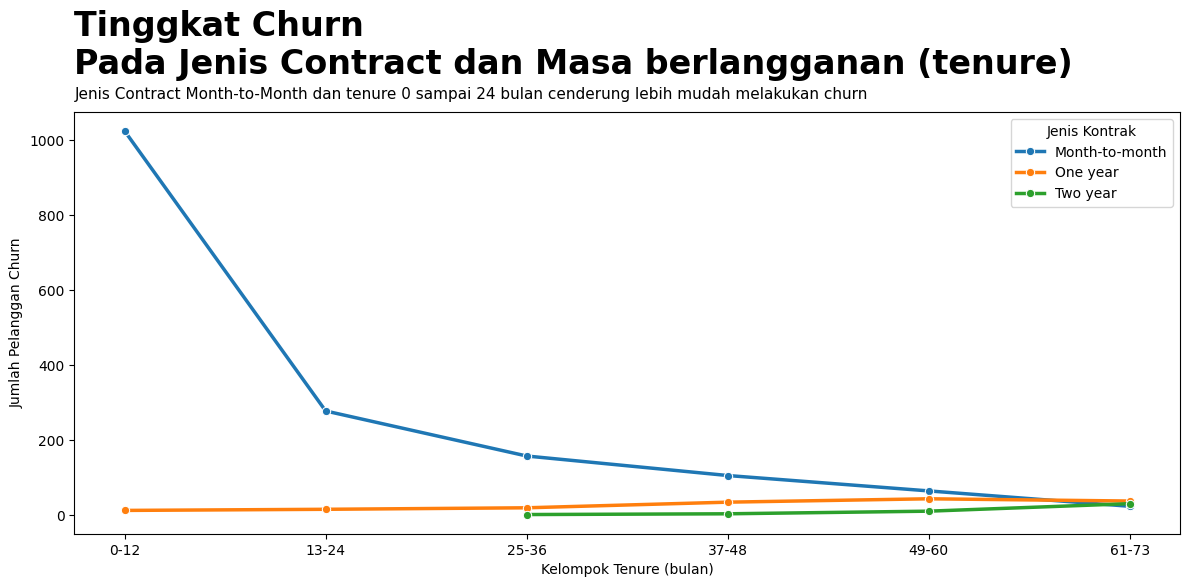

,min,max
tenure_group,,
0-12,1,12
13-24,13,24
25-36,25,36
37-48,37,48
49-60,49,60
61-73,61,72


In [146]:


# Buat kolom status
df['status'] = df.apply(
    lambda x: 'Married' if x['SeniorCitizen'] == 1 or x['Partner'] == 'Yes' or x['Dependents'] == 'Yes' else 'Single',
    axis=1
)

# Kelompokkan tenure
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-73'])

# Filter churn == 'Yes' dan hitung jumlah customer churn unik
plot1_data = df[df['Churn'] == 'Yes'].groupby(['tenure_group', 'Contract'], observed=True)['customerID'].nunique().reset_index()
plot1_data.rename(columns={'customerID': 'churn_count'}, inplace=True)

# Plot visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot1_data, x='tenure_group', y='churn_count', hue='Contract', marker='o', linewidth=2.5)

# Judul dan keterangan sesuai isi data
plt.title("Tinggkat Churn \nPada Jenis Contract dan Masa berlangganan (tenure) ", y=1.07,fontsize=24, fontweight='bold', loc='left')
plt.text(x=0, y=1.03, s="Jenis Contract Month-to-Month dan tenure 0 sampai 24 bulan cenderung lebih mudah melakukan churn",
         fontsize=11, transform=plt.gca().transAxes, ha='left')

plt.xlabel("Kelompok Tenure (bulan)")
plt.ylabel("Jumlah Pelanggan Churn")
plt.legend(title="Jenis Kontrak")
plt.tight_layout()
plt.show()
df.groupby('tenure_group',observed=True)['tenure'].agg(['min', 'max'])

Dari data diatas kita bisa melihat bahwa pada saat **masa berlanggana/tenure** 0 sampai dengan 24 bulan dan dengan jenis **contract** Month to Month** <br>memiliki tingkat Churn paling tinggi dan semakin tinggi **tenure** semakin rendah tingkat churn pelanggannya, dan pada jenis **contract** one-year dan two-year tidak terlihat begitu signifikan perubahan churn dari pelanggannya. <br><br>

Dari sini bisa disimpulkan bahwa perlu adanya evaluasi dan antisipasi terhadap churn di tingkat **tenure rendah** dan pada **contract Month-to Mont**, adanya indikasi pelanggan yang tidak puas terhadap layanan yang ada, sehingga harus adanya evaluasi akan apa yang terjadi ini.

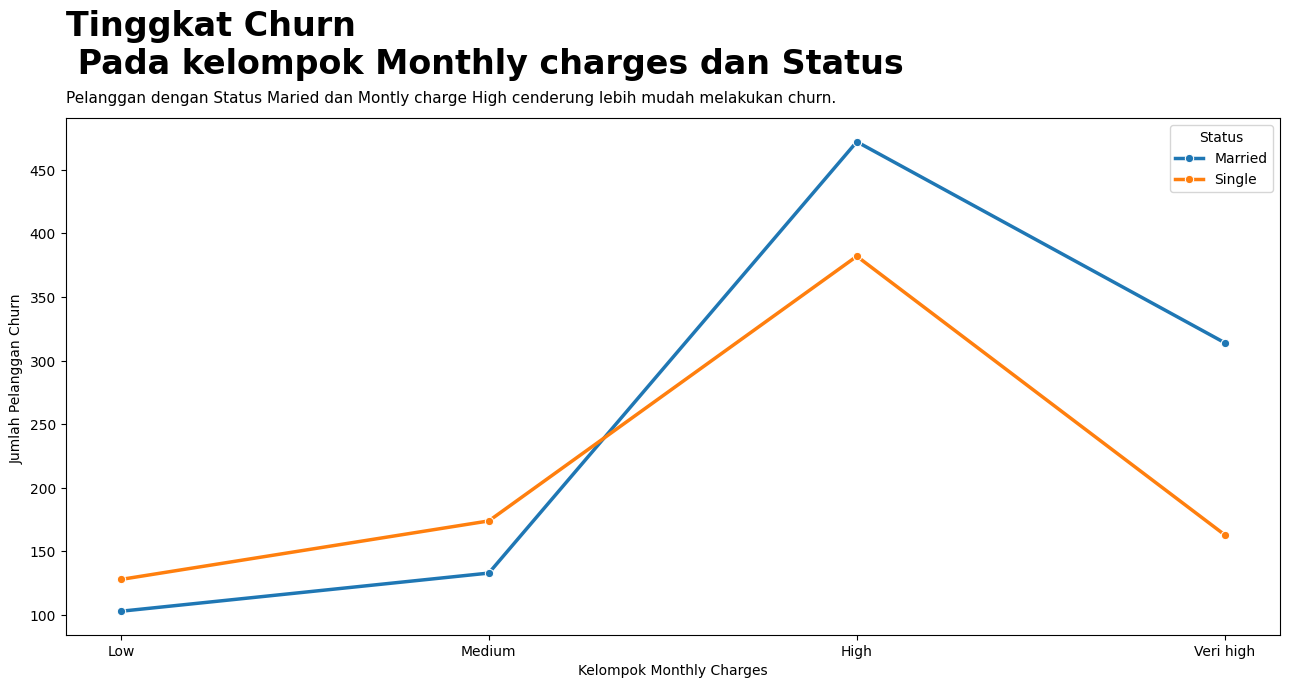

,min,max
charge_group,,
Low,18.25,42.90
Medium,43.05,69.00
High,69.05,94.00
Veri high,94.05,118.75


In [149]:
df['charge_group'] = pd.cut(df['MonthlyCharges'], bins=[17, 43, 69, 94, 120],
                            labels=['Low', 'Medium', 'High','Veri high'])

plt.figure(figsize=(13, 7))
plot2_data = df[df['Churn'] == 'Yes'].groupby(['charge_group', 'status'], observed=True)['customerID'].nunique().reset_index()
sns.lineplot(data=plot2_data, x='charge_group', y='customerID', hue='status', marker='o', linewidth=2.5)

plt.title("Tinggkat Churn \n Pada kelompok Monthly charges dan Status", y=1.07,fontsize=24, fontweight='bold', loc='left')
plt.text(x=0, y=1.03, s="Pelanggan dengan Status Maried dan Montly charge High cenderung lebih mudah melakukan churn.",
         fontsize=11, transform=plt.gca().transAxes, ha='left')
plt.xlabel("Kelompok Monthly Charges")
plt.ylabel("Jumlah Pelanggan Churn ")
plt.legend(title="Status")
plt.tight_layout()
plt.show()
df.groupby('charge_group',observed=True)['MonthlyCharges'].agg(['min', 'max'])
# df['MonthlyCharges'].describe()

Dari data diatas dengan kelompok **Monthly Charge yang tinggi 69 sampai 94** memiliki tingkat **churn yang cukup tinggi**, begitu pun dengan status **Maried** dan **Single** pada area tersebut memiliki tingkat churn yang cukup tinggi. awal kenaikan tingkat churn berada dikelompok **Monthly charger Medium** di area 43 sampai 69. <br> Kemudian untuk status **Married** memiliki tingkat Churn lebih tinggi dibanding **single**. <br> Indikasi seperti ini menjadi perhatian kenapa pelanggan melakukan churn dengan **Montly Chargr** yang tinggi, apakah pelanggan memang merasa terbebani dengan biaya tersebut, merasa kemahalan bila dibandingkan dengan layanan dari perusahaan lain, perlu perhatian terhadap hal ini. kemudian dari status mengapa **status singgle** lebih sedikit melakukan **churn** hal ini juga merupakan bahan evaluasi, apakah tingkat decision making pelanggan dengan **status Married** berbeda dengan **single** pendekatan seperti apa untuk mengurangi tingkat **churn** pada status married, apakah perlu diadakan nya promo khusus bagi yang sudah Married. ini bisa jadi bahan pertimbangan bagi perusahaan dalam mengatasi tingkat **churn** pelanggan ini.